# 1. BoW (Bag of Words) : 문자 -> 숫자로 변환하는, 가장 기본적인 방법
<순서><br>
1. 전체 문서 {$D_1, D_2, ... , D_n$} 을 구성하는 고정된 단어장 {$W_1, W_2, ... , W_n$}을 만든다.
2. $D_i$라는 개별 문서에 $W_j$ 라는 단어가 있는지 표시 - 있으면: $x_{ij}$ = 1, 없으면 0


# 2. Scikit-Learn의 문서 전처리 기능

- DictVectorizer : 단어의 수를 세어놓는 사전에서 BoW 벡터 생성.
- CountVectorizer : 문서 집합에서 단어 수를 세서 BoW 벡터 생성.
- TfidfVectorizer : 문서 집합에서 단어 수를 세고, TF-IDF방식으로 단어의 가중치를 조정한 BoW 벡터 생성.
- HashingVectorizer : Hashing trick을 사용, 빠르게 BoW벡를 생성.

## 1) DictVectorizer

In [1]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A' : 1, 'B' : 2}, {'B' : 3, 'C' : 1}]  #사전형태의 D가 존재
X = v.fit_transform(D) #D의 key에 따른 value를 array형태로 리턴
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [2]:
v.feature_names_

['A', 'B', 'C']

In [4]:
v.transform({'C' : 4, 'D' : 3})

array([[0., 0., 4.]])

## 2) CountVectorizer
<순서><br>
1. tokenizing : token으로 쪼갠다. (list형태)
2. counting : 개별 token을 센다.
3. BoW vectorizing : BoW벡터를 생성.<br>
<br>

<인수><br>
1. stop_words : 문자열{'english}, 리스트 또는 None(디폴트)
2. analyzer : 문자열 {'word', 'char', 'char_wb'} 또는 함수
3. token_pattern : string - 토큰 정의용 정규표현식
4. tokenizer : 토큰 생성 함수
5. ngram_range : (min_n, max_n) 튜플, ngram의 범위
6. max_df : 정수 또는 [0,1]사이의 실수, 단어장에 포함되기 위한 최대 빈도
7. min_df : 정수 또는 [0,1]사이의 실수, 단어장에 포함되기 위한 최소 빈도

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',    
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_ #문장을 token으로 찢어서 단어장 리턴

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'last': 4,
 'one': 5,
 'second': 6,
 'the': 7,
 'third': 8,
 'this': 9}

### 2)-1. Stop Words : 단어장을 생성할 때 무시할 수 있는 단어들 (영어의 관사, 조사 등)

In [8]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'document': 0, 'first': 1, 'last': 2, 'one': 3, 'second': 4, 'third': 5}

In [10]:
vect = CountVectorizer(stop_words='english').fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

### 2)-2. 토큰  : analyzer / tokenizer / token_pattern 의 인수를 활용

In [11]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{' ': 0,
 '.': 1,
 '?': 2,
 'a': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'h': 8,
 'i': 9,
 'l': 10,
 'm': 11,
 'n': 12,
 'o': 13,
 'r': 14,
 's': 15,
 't': 16,
 'u': 17}

In [13]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'the': 0, 'third': 1, 'this': 2}

In [15]:
# tokenizer : 외부의 token단어장을 사용할 수 있음.
import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'.': 0,
 '?': 1,
 'and': 2,
 'document': 3,
 'first': 4,
 'is': 5,
 'last': 6,
 'one': 7,
 'second': 8,
 'the': 9,
 'third': 10,
 'this': 11}

### 2)-3. n-그램 : 단어장 생성에 사용한 토큰의 크기를 결정 - 복합어를 인정할 것인가?

In [16]:
vect = CountVectorizer(ngram_range=(2,2)).fit(corpus)
vect.vocabulary_

{'and the': 0,
 'first document': 1,
 'is the': 2,
 'is this': 3,
 'last document': 4,
 'second document': 5,
 'second second': 6,
 'the first': 7,
 'the last': 8,
 'the second': 9,
 'the third': 10,
 'third one': 11,
 'this is': 12,
 'this the': 13}

In [17]:
#다른 조건과 같이 쓸 수 있음.
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'the': 0, 'the third': 1, 'third': 2, 'this': 3, 'this the': 4}

### 2)-4. 빈도수 : max_df, min_df인수를 사용, 문서 내 토큰의 빈도수로 사용여부 결정


In [18]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'document': 0, 'first': 1, 'is': 2, 'this': 3},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [19]:
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3])

## 3) TfidfVectorizer
- TF-IDF (Term Frequency - Inverse Document Frequency)
- 모든 문서에 공통으로 들어 있을 경우, "가중치 축소"(Inverse) <br>
$\text{tf-idf}(d, t) = \text{tf}(d, t) \cdot \text{idf}(t)$ <br>
$\text{tf}(d, t)$ : 단어의 빈도수 (1 document, how many term),   $\text{idf}(t)$ : inverse document frequency (가중치 축소) <br>
$\text{idf}(d, t) = \log \dfrac{n}{1 + \text{df}(t)}$


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

# 3. 사용 예
- 문자열 분석기를 사용하여 웹사이트에 특정 단어가 얼마나 사용되었는지 빈도 측정하는 코드

In [21]:
from urllib.request import urlopen
import json
import string
from konlpy.utils import pprint
from konlpy.tag import Hannanum
hannanum = Hannanum()

f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
json = json.loads(f.read())
cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == "markdown"]
docs = [w for w in hannanum.nouns(" ".join(cell)) if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))]

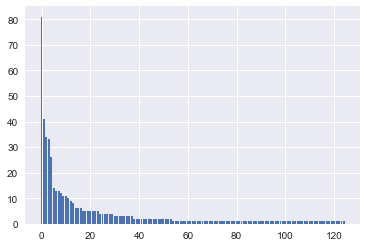

In [42]:
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0) #각 단어별로 나온 횟수를 표시 (앞서 docs는 하나의 단어씩으로 이루어져있음 : sum)
idx = np.argsort(-count) #count를 내림차순했을때 각 성분의 idx
count = count[idx] #나온 횟수 기준으로 내림차순 정렬 상태로 만듬.

feature_name = np.array(vect.get_feature_names())[idx] #idx의 순서대로 햇을때 단어장 속 단어들을 표시
plt.bar(range(len(count)), count)
plt.show()

In [43]:
pprint(list(zip(feature_name, count))) #많이 나온 순서대로 단어장 표시

[('컨테이너', 81),
 ('도커', 41),
 ('명령', 34),
 ('이미지', 33),
 ('사용', 26),
 ('가동', 14),
 ('중지', 13),
 ('mingw64', 13),
 ('삭제', 12),
 ('이름', 11),
 ('아이디', 11),
 ('다음', 10),
 ('시작', 9),
 ('목록', 8),
 ('옵션', 6),
 ('a181562ac4d8', 6),
 ('입력', 6),
 ('외부', 5),
 ('출력', 5),
 ('해당', 5),
 ('호스트', 5),
 ('명령어', 5),
 ('확인', 5),
 ('경우', 5),
 ('재시작', 4),
 ('존재', 4),
 ('컴퓨터', 4),
 ('터미널', 4),
 ('프롬프트', 4),
 ('포트', 4),
 ('377ad03459bf', 3),
 ('가상', 3),
 ('수행', 3),
 ('문자열', 3),
 ('dockeruser', 3),
 ('항목', 3),
 ('마찬가지', 3),
 ('대화형', 3),
 ('종료', 2),
 ('상태', 2),
 ('저장', 2),
 ('호스트간', 2),
 ('작업', 2),
 ('지정', 2),
 ('생각', 2),
 ('문헌', 2),
 ('동작', 2),
 ('시스템', 2),
 ('명시해', 2),
 ('특정', 2),
 ('관련하', 2),
 ('이때', 2),
 ('의미', 2),
 ('추가', 2),
 ('조합', 1),
 ('container', 1),
 ('폴더', 1),
 ('a1e4ed2ac65b', 1),
 ('작동', 1),
 ('자체', 1),
 ('자동', 1),
 ('image', 1),
 ('정지', 1),
 ('핵심', 1),
 ('초간단', 1),
 ('중복', 1),
 ('id', 1),
 ('최소한', 1),
 ('일부분', 1),
 ('컨테이', 1),
 ('daemon', 1),
 ('컨테이너상', 1),
 ('한다', 1),
 ('콜론', 1),
 ('태그', 1),
 ('하